# 이론
- 지금까지 다룬 DNN, CNN 등은 입력값이 한방향으로만 계산되어 출력이 계산되는 구조였다.   
- 이렇게 **한쪽 방향으로만 데이터가 흐르는** 신경망을 **Feed Forward Network, FFN**라고 한다.   
- 이와 달리 매 입력에 대한 inference 혹은 iteration 마다 은닉층 값 계산 시 **미리 보관하고 있던 값과 입력으로부터 계산된 값을 모두 사용**하는 신경망 구조를 순환 신경망 (Recurrent Neural Networks, RNN)이라고 한다.

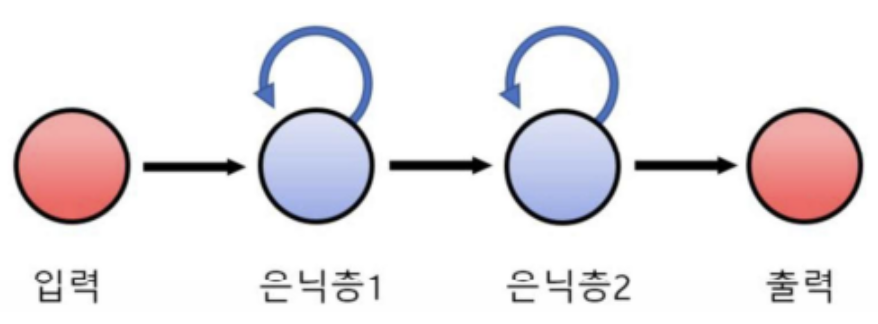

### 순환 신경망
- RNN에 대해 이해하기 위해 이전과 달리 **데이터 입력 순서 및 각 순서에 따른 index**를 고려해야 한다.   
- 따라서 RNN은 일반적으로 **시간 순서가 있는 데이터**에 대해 적용하며 **자연어 데이터, 음성 데이터 및 시계열 데이터**가 대표적인 예시이다.   
- MLP, CNN에서는 데이터를 한꺼번에 신경망에 입력해줬으나, RNN은 시퀸스 데이터를 대상으로 하여 **매 time step마다 시퀸스의 요소 하나씩을 입력**한다.   
- 첫 번째 단어가 RNN에 입력되면, 입력->은닉->출력 순서로 계산후 결과값을 도출한다.
- 두 번째 단어가 입력되면 동일하게 계산이 수행되나, **은닉층에서 첫 번째 단어에 대한 은닉층 값 또한 가중치를 곱한 후 사용**된다.

RNN의 가장 중요한 특성 중 하나는 **다양한 길이의 입력 시퀸스를 처리할 수 있다**라는 것이다.   
- CNN은 고정된 입력을 받는데 반해 RNN은 입력된 시퀸스 길이만큼 순환 계산을 반복하면 되기 때문이다.

RNN에 **입력을 넣을 때 마다 매번 그에 해당하는 출력**값이 나오지만 입력값 설정과 출력값 중 어느 것을 유의미하게 해석해 사용할 것인지에 따라 RNN 활용 방식은 세 가지로 나뉜다.
- One-to-many: **입력 시퀸스 길이가 1, 출력을 다시 다음 time step의 입력값으로 사용**한다.
  - **이미지에서 뽑은 특성을 입력**받은 후 **이를 설명하는 문장을 생성**해내는 image captioning이 있다. -> 입력값을 유의미하게 해석
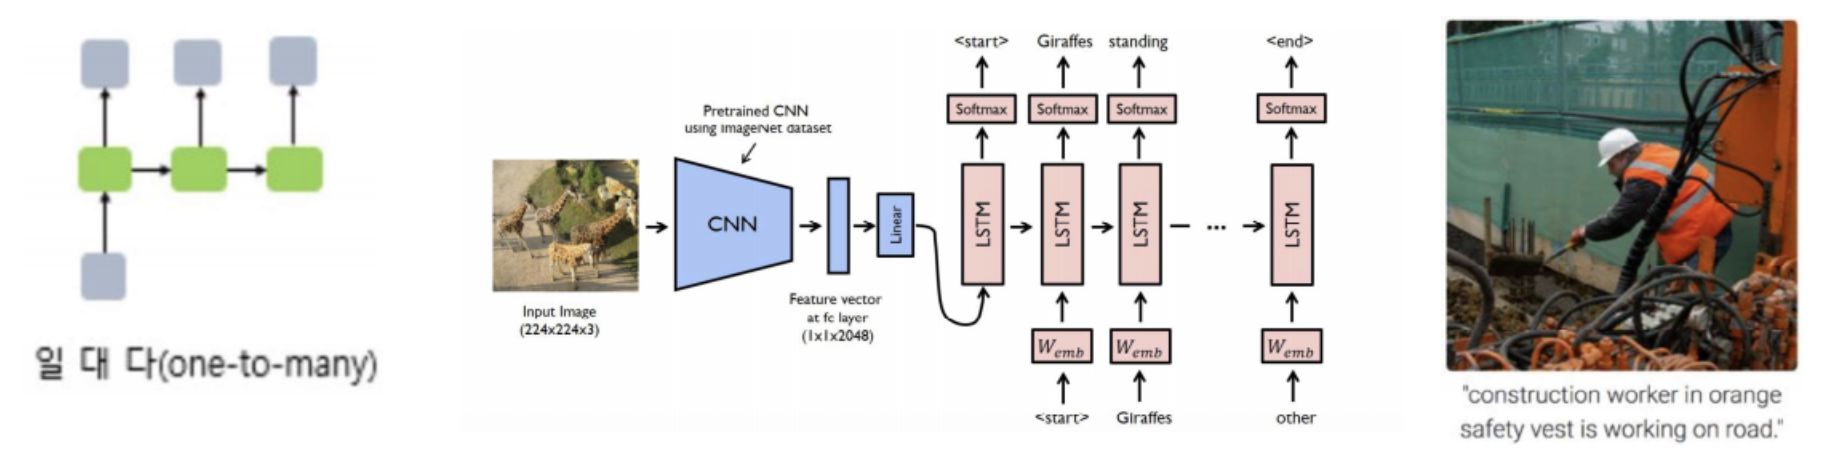
- Many-to-one: **입력 시퀸스는 길이가 다양할 수 있고 매 time step마다 결과가 나오지만 모든 시퀸스를 다 입력한 다음 나오는 결과만 활용**하는 방법이다. -> 출력값을 유의미하게 해석
  - **텍스트 분류**가 있다.
  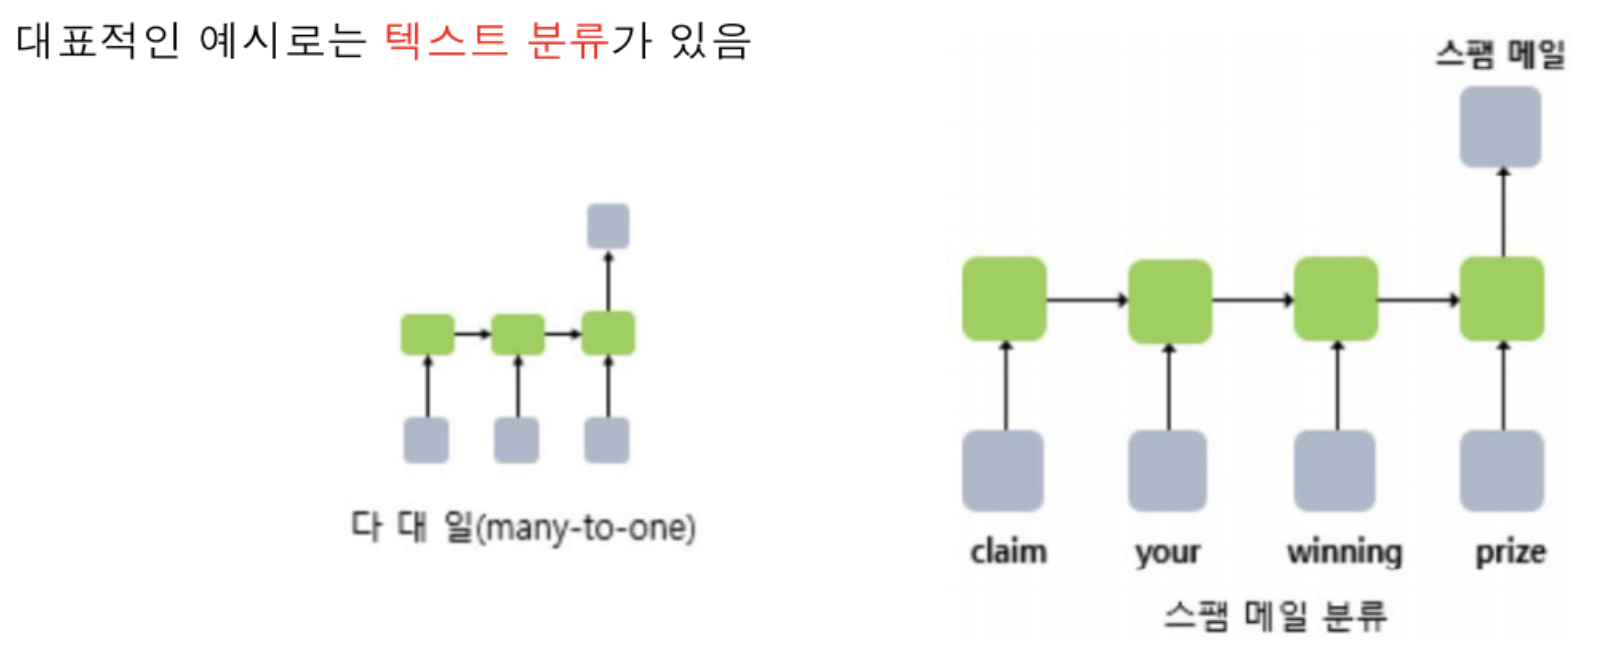
- Many-to-many: **입력 시퀸스에 대해 매 time step마다 나오는 결과를 종합하여 활용**한다.
  - **기계 번역**이 있다.
  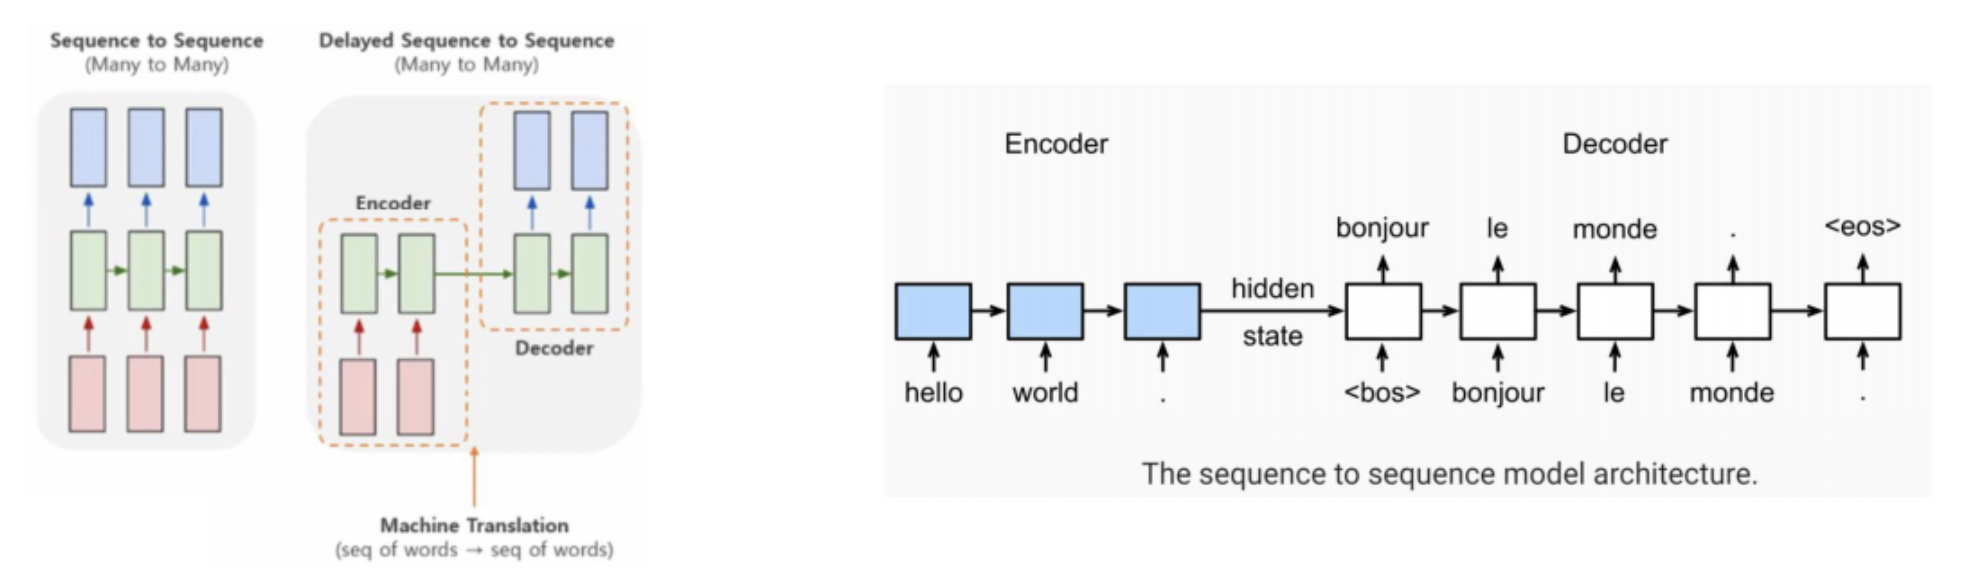


### 순환 신경망 상세 구조
RNN에서 입력층, 은닉층, 출력층의 각 데이터 벡터를 x,h,y로 두고 계산에 필요한 가중치를 아래와 같이 정의한다.   

$h_t = tanh(W_x x_t + W_h h_{t-1} + b)$   
- **입력층, 은닉층의 뉴런 개수를 모두 4개라고 가정**하면 아래 그림과 같이 은닉층 연산을 나타낼 수 있다.
  - $D_h$: 은닉층 뉴런 개수, $d$: 입력층 뉴런 개수(혹은 **자연어 처리의 경우 임베딩 크기**)
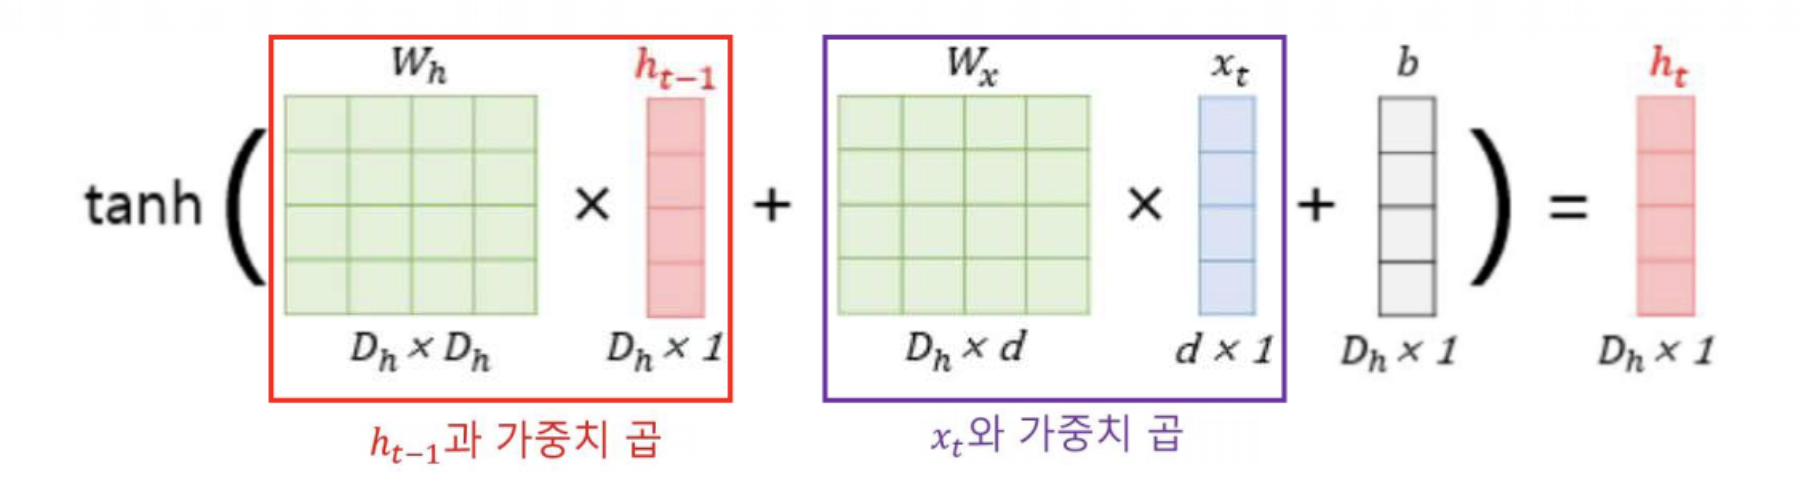

**이전 time step에서의 은닉층 값**이 꼭 필요하다.   
이와 같은 은닉층 값을 **hidden state**라 하고 별도 변수로 관리한다.   
또한 **시퀸스가 시작할 때**는 hidden state를 제로텐서로 초기화 한 후 RNN의 예측값 계산을 시작한다.   
RNN에 여러 은닉층이 있으면 이전 time step의 값을 참조할 때 **서로 같은 층의 값만 참조**한다.   
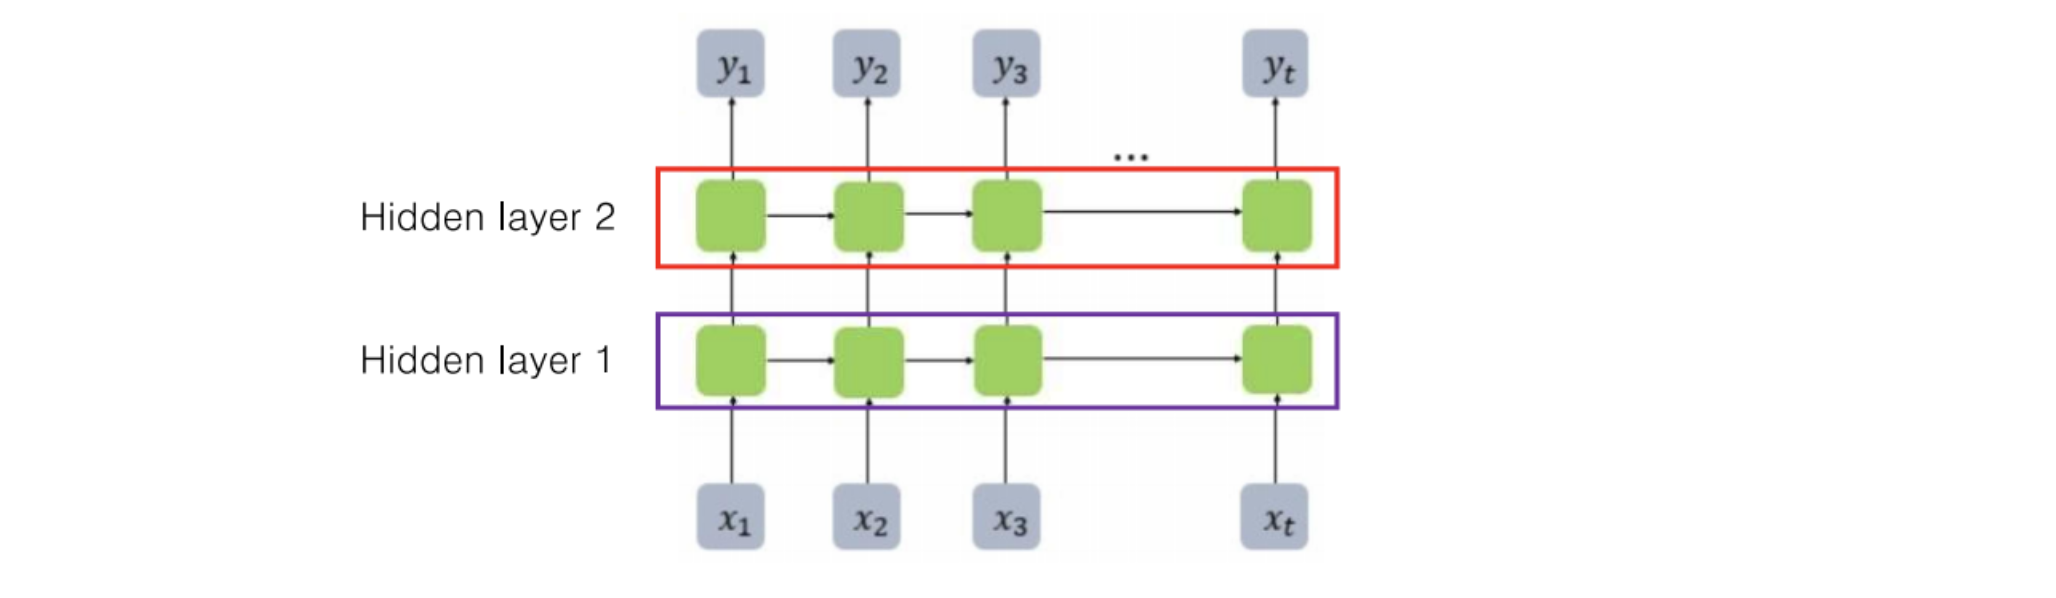

### 양방향 순환 신경망
RNN은 기본적으로 time step 순서대로 값을 입력해 결과값을 생성하지만, 때로는 오히려 time step의 역순으로 분석하는 것이 도움이 될 때가 있다. (특히 NLP)      
이에 **역방향으로도 값들을 입력하여 결과를 도출한 후 이를 합친 것을 최종 결과**로 사용하는 RNN 형식을 **양방향(bi-directional) 순환 신경망**이라고 한다.   
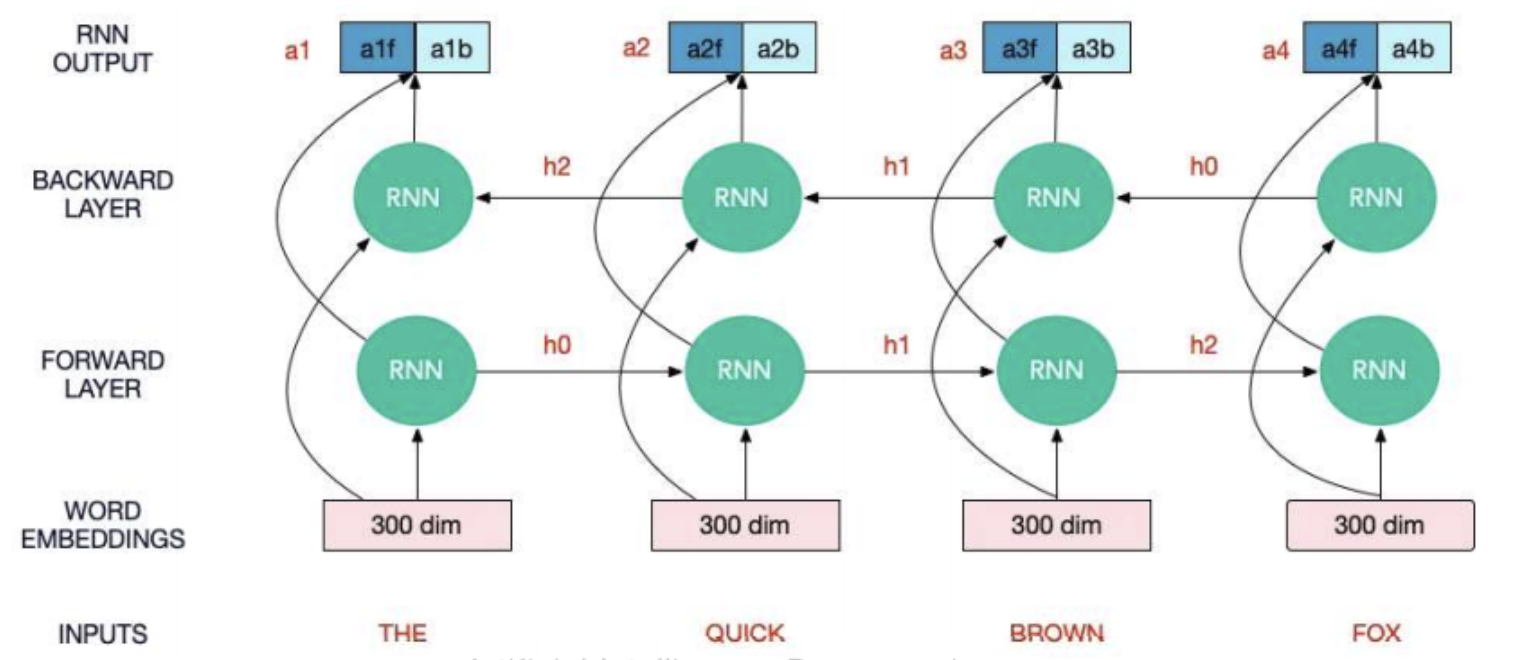   
#### 장기 의존성 문제
지금까지 다룬 RNN을 가장 단순한 RNN이라는 의미로 vanilla RNN이라고 한다.   
바닐라 RNN은 구조상 입력 시퀸스 길이가 길어지면 **처음에 분석했던 정보를 나중까지 유지하기는 매우 어렵다.**   
계속해서 희석되어가기 때문이다.   
바닐라 RNN에 장기 기억을 위한 메모리를 더해준 신경망 구조가 **Long Short Term Memory, LSTM** 신경망이다.

### LSTM
LSTM의 한 층(cell이라고도 함)은 아래 형태로 수겅되며 바닐라 RNN의 은닉층 값 이외에 **cell state라고 불리는** $C_t$가 추가로 존재한다.   
$C_t$는 **장기적으로 관리해야 할 지식들을 따로 관리하는 벡터**라고 볼 수 있다.   
따라서 LSTM은 $h_t$ 및 $C_t$에 대해 순환 연산 구조를 갖고 있다고 요약 가능하다.   
상세한 구조 및 작동 원리는 생략한다.   
RNN 계열 신경망 구조를 나타낼 때 **어떤 종류의 RNN cell을 썼는지 명시**하고, 전체적인 구조는 바닐라 RNN에서 배웠던 구조처럼 나타낸다.   
- 단방향 or 양방향, 은닉층 개수 등
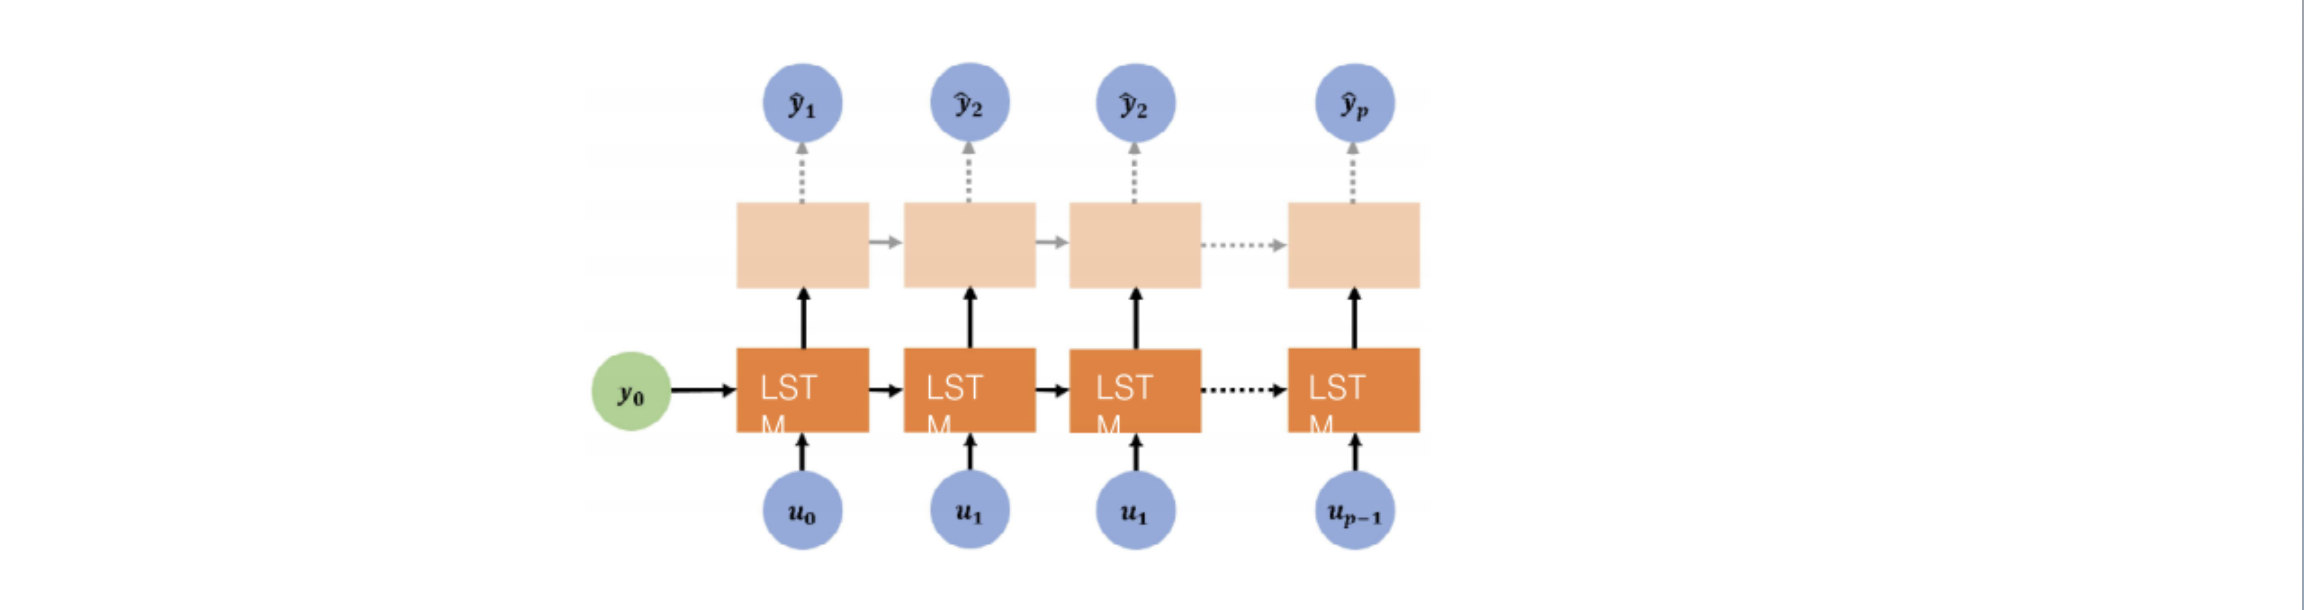   

바닐라 RNN과 LSTM은 hidden state와 output 값이 따로 존재하지만, LSTM의 구조를 단순화하여 **장기 기억에 능하면서 따로 output을 내지 않고 hidden state만 갖도록 해 속도 및 메모리 효율성을 개선한 GRU**라는 cell 형태가 있다.   
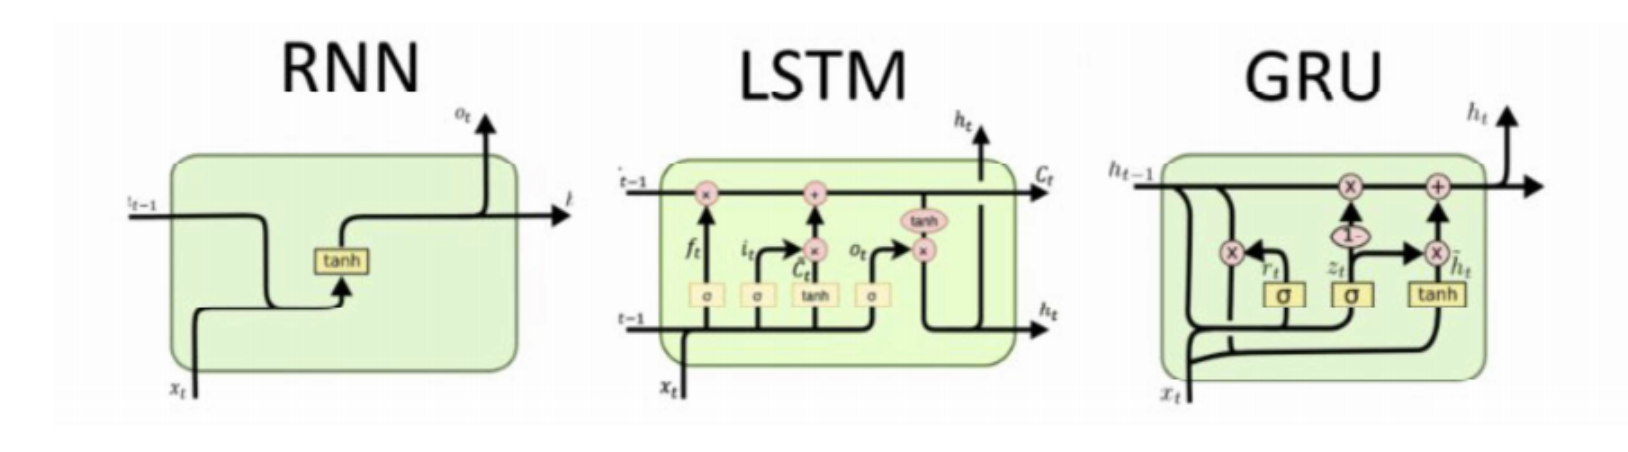   
# 구현

In [7]:
import numpy as np # for linear algebra
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import string
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daejlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


자연어 처리 관련 데이터를 다룰 때에 **전처리, 데이터셋 및 데이터로더 생성까지가 다소 까다로운 부분**이지만 그 이후는 텐서로 하므로 다른 딥러닝 작업과 비슷하다.

In [8]:
is_cuda = torch.cuda.is_available()
# if we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")
base_csv = 'IMDB Dataset.csv'
df = pd.read_csv(base_csv)
df.head()

GPU not available, CPU used


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
X,y = df['review'].values, df['sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'shape of x_train: {x_train.shape}')
print(f'shape of x_test: {x_test.shape}')

shape of x_train: (40000,)
shape of x_test: (10000,)


각 column을 분리한다.   
sklearn의 train_test_split 함수로 통합 데이터를 train, test로 분리할 수 있다.

In [10]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub(r'\s+', '', text) # replace all whitespace with no space
    text = re.sub(r'\d', '', text) # remove digits with no spaces
    return text

NLP에서 많이 활용되는 기본적인 전처리 진행

In [11]:
def tokenize(x_train, y_train, x_val, y_val):
  word_list = []
  
  stop_words = set(stopwords.words('english'))
  for s in x_train:
    for w in s.lower().split():
      w = preprocess_text(w)
      if w not in stop_words and w != '':
        word_list.append(w)
  
  corpus = Counter(word_list)
  # sorting on the basis of most common words
  corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:1000]
  # creating a dict
  onehot_dict = {w: i+1 for i, w in enumerate(corpus_)}
  # tokenize
  final_list_train, final_list_test = [], []
  for s in x_train:
    final_list_train.append([onehot_dict[preprocess_text(w)] for w in s.lower().split() if preprocess_text(w) in onehot_dict.keys()])
  for s in x_val:
    final_list_test.append([onehot_dict[preprocess_text(w)] for w in s.lower().split() if preprocess_text(w) in onehot_dict.keys()])
  encoded_train = [1 if label == 'positive' else 0 for label in y_train]
  encoded_test = [1 if label == 'positive' else 0 for label in y_val]
  print(f'length of encoded_train: {len(encoded_train)}')
  print(f'length of encoded_test: {len(encoded_test)}')
  print(f'length of final_list_train: {len(final_list_train)}')
  print(f'length of final_list_test: {len(final_list_test)}')
  return final_list_train, encoded_train, final_list_test, encoded_test, onehot_dict

토큰화 및 단어 사전 생성, 단어를 인덱스로 변환 및 라벨을 인덱스로 변환   
오류가 발생하여 강의자료와 다르게 일반 파이썬 배열로 리턴했다.

In [12]:
x_train, y_train, x_val, y_val, onehot_dict = tokenize(x_train, y_train, x_test, y_test)
print(f'Length of vocabulary is {len(onehot_dict)}')

length of encoded_train: 40000
length of encoded_test: 10000
length of final_list_train: 40000
length of final_list_test: 10000
Length of vocabulary is 1000


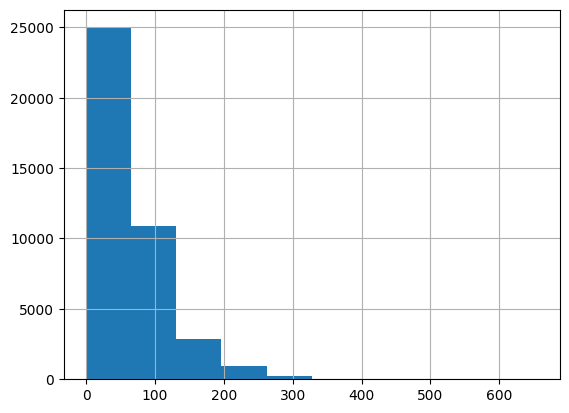

count    40000.000000
mean        69.237100
std         47.975406
min          0.000000
25%         39.000000
50%         54.000000
75%         84.000000
max        655.000000
dtype: float64

In [13]:
rev_len = [len(x) for x in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

200단어까지를 길이 상한으로 설정하자.

In [14]:
def padding_(sentences, seq_len):
  features = np.zeros((len(sentences), seq_len), dtype=int)
  for i, row in enumerate(sentences):
    if len(row) != 0:
      features[i, -len(row):] = np.array(row)[:seq_len]
  return features

x_train_pad = padding_(x_train, 200)
x_val_pad = padding_(x_val, 200)

200단어에 맞춰 모든 데이터를 다시 정리한다.   
더 짧은 데이터는 **앞쪽 인덱스를 0으로 채우고 나서 각 단어의 인덱스를 채워 200을 맞추었다.**
- NLP에서의 zero-padding은 앞, 뒤쪽 다 가능하다.

더 길면 뒤를 버린다.

In [15]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(np.array(y_train)))
valid_data = TensorDataset(torch.from_numpy(x_val_pad), torch.from_numpy(np.array(y_val)))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)

정리된 데이터를 이용해 데이터셋 및 데이터로더를 생성한다.   
- numpy array에 저장했으므로 TensorDataset 생성이 가능하다.
- 생성된 데이터셋이서 **데이터로더를 만드는 과정은 이미지 분류에서와 유사**하다.

In [16]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[  0,   0,   0,  ..., 115, 475,   3],
        [  0,   0,   0,  ...,  94, 180,  34],
        [  0,   0,   0,  ..., 194,   7,  45],
        ...,
        [  0,   0,   0,  ..., 422, 839, 675],
        [  0,   0,   0,  ...,  57,   2, 407],
        [  0,   0,   0,  ..., 331,   9,   4]])
Sample input: 
 tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0])


데이터로더로부터 샘플링하여 데이터를 직접 확인한다.

In [17]:
class GRU_model(nn.Module):
  def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, device):
    super(GRU_model, self).__init__()
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
    self.device = device
    
    self.embed = nn.Embedding(n_vocab, embed_dim)
    self.gru = nn.GRU(embed_dim, hidden_dim, n_layers, batch_first=True)
    self.out = nn.Linear(hidden_dim, n_classes)
  
  def forward(self, x):
    x = self.embed(x)
    h_0 = self._init_state(batch_size=x.size(0)) # init first hidden state
    x, _ = self.gru(x, h_0) # GRU's return is batch size, seq length, hidden dim
    h_t = x[:,-1,:] # size changed to batch size, hidden dim, we want time-step's hidden state
    logit = self.out(h_t)
    return logit
    
  def _init_state(self, batch_size):
    new_state = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(self.device)
    return new_state

GRU 모델을 구현한다.   
GRU cell 이외의 nn.Embedding 및 최종 분류를 위한 전결합층(nn.Linear)가 필요하다.   
파이토치의 RNN 셀들은 **forward 수행시 hidden state를 입력**해주어야 한다.

In [18]:
n_layers = 1
vocab_size = len(onehot_dict) + 1 # +1 for the padding
hidden_dim = 128
embedding_dim = 100
n_classes = 2

model = GRU_model(n_layers, hidden_dim, vocab_size, embedding_dim, n_classes, device).to(device)

GRU 모델 객체를 생성한다.

In [20]:
def train(model, criterion, optimizer, data_loader):
  model.train()
  train_loss = 0
  for i, (x, y) in enumerate(data_loader):
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    logit = model(x)
    loss = criterion(logit, y)
    loss.backward()
    optimizer.step()

    train_loss += loss.item() * x.size(0)

  return train_loss / len(data_loader.dataset)

def evaluate(model, data_loader):
  model.eval()
  corrects, total_loss = 0, 0
  for i, (x, y) in enumerate(data_loader):
    x, y = x.to(device), y.to(device)
    logit = model(x)
    corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
  size = len(data_loader.dataset)

  avg_accuracy = 100.0 * corrects/size
  return avg_accuracy

에포크 단위 학습 및 검증을 수행하는 함수 작성

In [ ]:
num_epochs = 10
lr = 0.001

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for e in range(1, num_epochs + 1):
  train_loss = train(model, criterion, optimizer, train_loader)
  test_accuracy = evaluate(model, valid_loader)
  print("[Epoch: %d] Train Loss: %5.2f | Test Accuracy: %5.2f" % (e, train_loss, test_accuracy))